In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [2]:
root_dir = r"F:\Muthu_2023\Personal\NextStep\Hackathon\DeHaDo_AI"
file = 'df_final_trocr_base.csv'

In [3]:
model_res_path = root_dir + "/" + r"tokenwise-dehado-ai\results\OCR_Results"
df_pred = pd.read_csv(model_res_path + "/" + file)

In [5]:
label_file = root_dir + "/" + r"Dataset\temp\test.csv"
df_act = pd.read_csv(label_file)

# Preprocessing

In [16]:
df_act['folder'] = df_act['image'].apply(lambda x: x.split("/")[2])
df_act['file'] = df_act['image'].apply(lambda x: x.split("/")[-1].replace(".jpg", ""))
df_act.drop('image', axis=1, inplace=True)
df_act.head()

,text,folder,file
0,Hema Vasa,MIT_10,candidatename
1,Vincent Vasa,MIT_10,Fatherhusbandname
2,9/28/1962,MIT_10,Dateofbirth
3,12th Pass,MIT_10,qualification
4,Married,MIT_10,maritalstatus


In [12]:
df_pred.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
df_pred.rename(columns={'text': 'pred_text'}, inplace=True)
df_pred.head()

,folder,file,pred_text
0,MIT_290,nationality,indian
1,MIT_290,Dateofbirth,"3/6,1972"
2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal
3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309"
4,MIT_290,experience,7 .years at Talwar-sha


# Combine Label and Predictions

In [18]:
df_comb = pd.merge(df_pred, df_act, on = ['folder', 'file'], how='left')

In [21]:
df_comb.rename(columns={'text': 'actual_text'}, inplace=True)
df_comb.head()

,folder,file,pred_text,actual_text
0,MIT_290,nationality,indian,Indian
1,MIT_290,Dateofbirth,"3/6,1972",03-06-1972
2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal,Bahadurjit Aggarwal
3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309","H.No. 18, Loyal Circle, Jalandhar 309001"
4,MIT_290,experience,7 .years at Talwar-sha,7 years at Talwar-Sha


# EDA on Labels

- Special character distibution by field
- Distribution of special characters across field

In [31]:
d_special = {}
def count_special_characters(data):
    cnt = 0
    for char in data:
        if char in string.punctuation:
            cnt += 1
            if char in d_special:
                d_special[char] += 1
            else:
                d_special[char] = 1
    return cnt            

In [32]:
df_comb['n_special'] = df_comb['actual_text'].apply(count_special_characters)

<Axes: xlabel='file'>

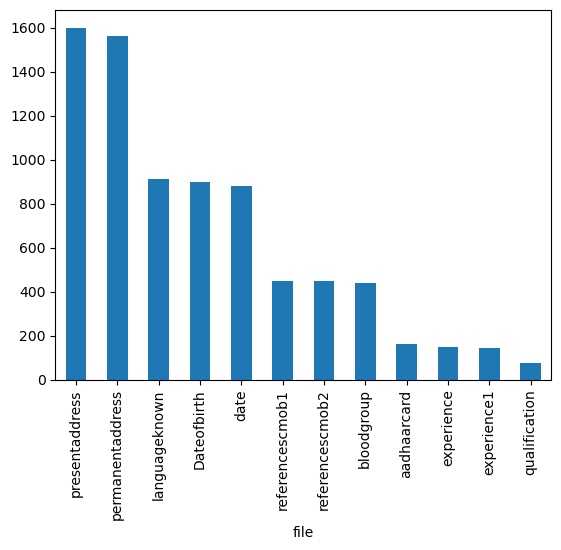

In [37]:
res = df_comb.groupby('file')['n_special'].sum()
res[res>0].sort_values(ascending=False).plot(kind='bar')

In [33]:
d_special

{'-': 2242, '.': 796, ',': 2710, '+': 229, '/': 1746, '&': 2}

### Inference:
- Only 6 different special characters are present with '&' being neglegible

In [ ]:
def count_special_character(data, s_chr):
    cnt = 0
    if 
    for char in data:
        if char in string.punctuation:
            cnt += 1
            if char in d_special:
                d_special[char] += 1
            else:
                d_special[char] = 1
    return cnt   

In [39]:
df_comb['n_hipen'] = df_comb['actual_text'].apply(lambda x: x.count('-'))
df_comb['n_dot'] = df_comb['actual_text'].apply(lambda x: x.count('.'))
df_comb['n_comma'] = df_comb['actual_text'].apply(lambda x: x.count(','))
df_comb['n_plus'] = df_comb['actual_text'].apply(lambda x: x.count('+'))
df_comb['n_slash'] = df_comb['actual_text'].apply(lambda x: x.count('/'))
df_comb.head()

,folder,file,pred_text,actual_text,n_special,n_hipen,n_dot,n_comma,n_plus,n_slash
0,MIT_290,nationality,indian,Indian,0,0,0,0,0,0
1,MIT_290,Dateofbirth,"3/6,1972",03-06-1972,2,2,0,0,0,0
2,MIT_290,Fatherhusbandname,Bahadurjit Aggarwal,Bahadurjit Aggarwal,0,0,0,0,0,0
3,MIT_290,permanentaddress,"H.NO. 18 , LOYAL CURCLE , JALANDHAR-309","H.No. 18, Loyal Circle, Jalandhar 309001",4,0,2,2,0,0
4,MIT_290,experience,7 .years at Talwar-sha,7 years at Talwar-Sha,1,1,0,0,0,0


In [41]:
df_comb[df_comb['n_special'] > 0].groupby('file').sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1512\2299758303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comb[df_comb['n_special'] > 0].groupby('file').sum()


,n_special,n_hipen,n_dot,n_comma,n_plus,n_slash
file,,,,,,
Dateofbirth,898,174,0,0,0,724
aadhaarcard,164,0,164,0,0,0
bloodgroup,441,212,0,0,229,0
date,880,154,0,0,0,726
experience,150,150,0,0,0,0
experience1,143,143,0,0,0,0
languageknown,910,0,0,910,0,0
permanentaddress,1564,219,302,900,0,142
presentaddress,1600,215,330,900,0,154
